In [35]:
import sys
sys.path.insert(0,'..')

from nets.core import L_layer_model, L_model_forward
from nets.datasets import mnist_3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib inline
%load_ext autoreload
%autoreload 2

np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [2]:
X_train, X_test, y_train, y_test = mnist_3()

In [20]:
X_train.shape, y_train.shape

((784, 33600), (1, 33600))

In [21]:
X_test.shape, y_test.shape

((784, 8400), (1, 8400))

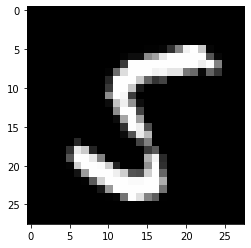

In [19]:
pixels = X_train[:, 1].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# Train the model

In [29]:
layers_dims = [784, 200, 10, 1]

In [30]:
parameters = L_layer_model(X_train, y_train, layers_dims, learning_rate = 0.01, num_epochs=50, print_cost=True)

Cost after epoch 0: 0.430735
Cost after epoch 1: 0.407093
Cost after epoch 2: 0.406123
Cost after epoch 3: 0.406656
Cost after epoch 4: 0.402005
Cost after epoch 5: 0.378021
Cost after epoch 6: 0.334475
Cost after epoch 7: 0.293193
Cost after epoch 8: 0.262095
Cost after epoch 9: 0.235715
Cost after epoch 10: 0.212467
Cost after epoch 11: 0.192013
Cost after epoch 12: 0.172629
Cost after epoch 13: 0.151504
Cost after epoch 14: 0.121766
Cost after epoch 15: 0.091258
Cost after epoch 16: 0.078650
Cost after epoch 17: 0.073980
Cost after epoch 18: 0.070814
Cost after epoch 19: 0.067999
Cost after epoch 20: 0.065257
Cost after epoch 21: 0.062358
Cost after epoch 22: 0.059637
Cost after epoch 23: 0.056836
Cost after epoch 24: 0.054057
Cost after epoch 25: 0.050842
Cost after epoch 26: 0.047419
Cost after epoch 27: 0.043933
Cost after epoch 28: 0.040461
Cost after epoch 29: 0.037132
Cost after epoch 30: 0.033917
Cost after epoch 31: 0.030588
Cost after epoch 32: 0.027551
Cost after epoch 33:

In [31]:
for key, matrix in parameters.items():
    print(matrix.min())
    print(matrix.max())

-0.09320459013245391
0.11064278401564764
-0.0189334747257819
0.0950427349487841
-0.24029721213176147
0.4342919239562986
-0.0026485388765461943
0.34566189866422237
-1.8883768265025473
1.1375569127385228
0.11393926123401367
0.11393926123401367


In [36]:
p, _ = L_model_forward(X_train, parameters)
y_train_pred = (p > 0.5).astype(int)

In [37]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train.reshape((-1),), y_train_pred.reshape((-1),))

0.9916071428571429

In [38]:
p, _ = L_model_forward(X_test, parameters)
y_test_pred = (p > 0.5).astype(int)
accuracy_score(y_test.reshape((-1),), y_test_pred.reshape((-1),))

0.9882142857142857